In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [6]:
data=pd.read_csv('C:/Users/Abhay/OneDrive/Desktop/unitext.txt.txt',header=None)

In [7]:
data.head()

,0,1
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [8]:
data.shape

(97, 2)

In [9]:
data.describe()

,0,1
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


Text(0.5,1,'Profit Prediction')

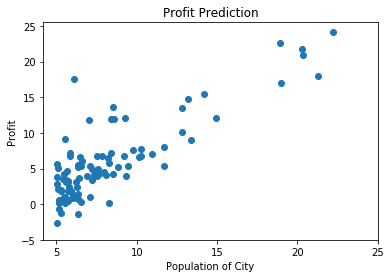

In [12]:
%matplotlib inline
plt.scatter(data[0],data[1])
plt.xticks(np.arange(5,30, step=5))
plt.yticks(np.arange(-5,30, step=5))
plt.xlabel('Population of City')
plt.ylabel('Profit')
plt.title('Profit Prediction')

In [17]:
def computecost(X,y,theta):
    
    m=len(y)
    predictions=X.dot(theta)
    square_err=(predictions-y)**2
    
    return 1/(2*m) * np.sum(square_err)

In [14]:
data_n=data.values

In [15]:
m= data_n[:,0].size
print(m)

97


In [19]:
X=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1))

computecost(X,y,theta)

32.072733877455676

In [24]:
def gradientDescent(X,y,theta,alpha,num_iters):
    m=len(y)
    J_history=[]
    for i in range(num_iters):
        predictions=X.dot(theta)
        error= np.dot(X.transpose(), (predictions -y))
        descent=alpha* 1/m *error
        theta=descent
        J_history.append(computecost(X,y,theta))
    return theta, J_history

In [25]:
theta,J_history = gradientDescent(X,y,theta,0.01,1500)
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

h(x) =-0.36 + -3.67x1


In [26]:
from mpl_toolkits.mplot3d import Axes3D

In [28]:
theta0_vals=np.linspace(-10,10,100)
theta1_vals=np.linspace(-1,4,100)
J_vals=np.zeros((len(theta0_vals),len(theta1_vals)))

for i in range(len(theta0_vals)):
    for j in range(len(theta1_vals)):
        t=np.array([theta0_vals[i],theta1_vals[j]])
        J_vals[i,j]=computecost(X,y,t)

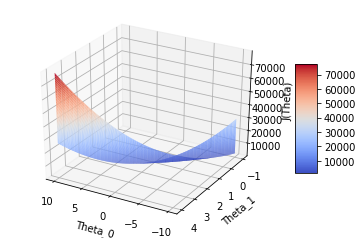

In [30]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf=ax.plot_surface(theta0_vals,theta1_vals,J_vals,cmap="coolwarm")
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_xlabel("Theta_0")
ax.set_ylabel("Theta_1")
ax.set_zlabel("J(Theta)")

#rotate for better angle
ax.view_init(30,120)